# Part I - Student Questionaire and Standardized Exam Results
## by Amanda Doty

## Introduction

This dataset consists of demographic data and exam scores for students from around the world. Data includes information about immediate family members, socio-economic status, school attendance and performance, and exam scores.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_spss('/Users/amand/WGU/Communicating Data Findings_A Doty_01.20.24/STU_QQQ.sav')

df.head(4)

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,test
0,Albania,Albania,800002.0,800251.0,07MS,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,303.127,362.862,370.634,376.306,343.337,339.973,323.844,2.41652,09MAY19:11:20:53,NaN
1,Albania,Albania,800002.0,800402.0,07MS,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,412.093,410.709,437.901,430.188,403.804,457.625,391.290,2.41652,09MAY19:11:20:53,NaN
2,Albania,Albania,800002.0,801902.0,07MS,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,258.384,337.295,248.659,291.314,326.906,311.582,284.867,1.69989,09MAY19:11:20:53,NaN
3,Albania,Albania,800002.0,803546.0,07MS,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,422.430,452.831,452.842,441.359,463.541,440.298,447.464,2.41652,09MAY19:11:20:53,NaN


In [3]:
df.shape

(612004, 1119)

In [26]:
# renaming the columns to be more descriptive
np.random.seed(42)

sample=np.random.choice(df.shape[0], 3000, replace=False)
df_subset = df.loc[sample]

df_subset.shape

(3000, 1119)

In [222]:
#choosing appropriate colummns to further shrink data
sub_df = df_subset[['CNT','ST003D03T','ST004D01T','ST005Q01TA','ST007Q01TA','ST011Q01TA','ST011Q03TA','ST013Q01TA'
                ,'ST127Q01TA','ST150Q01IA','ST150Q02IA','ST150Q03IA','ST153Q01HA','ST153Q03HA','ST153Q06HA'
                ,'ST160Q01IA','ST160Q02IA','ST175Q01IA','ST016Q01NA','ST034Q01TA','ST034Q03TA','MMINS','LMINS'
                ,'TMINS','WEALTH','PV1MATH','PV1READ','PV1RCUN','PV1RCER']]
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 163940 to 190881
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CNT         3000 non-null   category
 1   ST003D03T   3000 non-null   category
 2   ST004D01T   3000 non-null   category
 3   ST005Q01TA  2876 non-null   category
 4   ST007Q01TA  2829 non-null   category
 5   ST011Q01TA  2901 non-null   category
 6   ST011Q03TA  2902 non-null   category
 7   ST013Q01TA  2920 non-null   category
 8   ST127Q01TA  2741 non-null   category
 9   ST150Q01IA  2795 non-null   category
 10  ST150Q02IA  2794 non-null   category
 11  ST150Q03IA  2775 non-null   category
 12  ST153Q01HA  2786 non-null   category
 13  ST153Q03HA  2760 non-null   category
 14  ST153Q06HA  2761 non-null   category
 15  ST160Q01IA  2822 non-null   category
 16  ST160Q02IA  2798 non-null   category
 17  ST175Q01IA  2820 non-null   category
 18  ST016Q01NA  2405 non-null   category
 19 

In [223]:
sub_df=sub_df.dropna()

In [224]:
sub_df.shape

(1211, 29)

In [225]:
sub_df = sub_df.rename(columns={'ST003D03T':'birth_year','ST004D01T':'gender','ST005Q01TA':'mother_edu',
                                'ST007Q01TA':'father_edu','ST011Q01TA':'desk','ST011Q03TA':'quiet_place',
                                'ST013Q01TA':'qty_books','ST127Q01TA':'repeated','ST150Q01IA':'read_dia',
                                'ST150Q02IA':'read_fic','ST150Q03IA':'read_graphs','ST153Q01HA':'summ',
                                'ST153Q03HA':'small_groups','ST153Q06HA':'relate_to_life','ST160Q01IA':'require_read',
                                'ST160Q02IA':'enjoy_read','ST175Q01IA':'time_reading','ST016Q01NA':'life_satisfy',
                                'ST034Q01TA':'outsider','ST034Q03TA':'belong'})
sub_df.columns=[x.lower() for x in sub_df.columns]

sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 243365 to 190881
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   cnt             1211 non-null   category
 1   birth_year      1211 non-null   category
 2   gender          1211 non-null   category
 3   mother_edu      1211 non-null   category
 4   father_edu      1211 non-null   category
 5   desk            1211 non-null   category
 6   quiet_place     1211 non-null   category
 7   qty_books       1211 non-null   category
 8   repeated        1211 non-null   category
 9   read_dia        1211 non-null   category
 10  read_fic        1211 non-null   category
 11  read_graphs     1211 non-null   category
 12  summ            1211 non-null   category
 13  small_groups    1211 non-null   category
 14  relate_to_life  1211 non-null   category
 15  require_read    1211 non-null   category
 16  enjoy_read      1211 non-null   category
 17  time_re

In [226]:
sub_df = sub_df.reset_index(drop=True)

sub_df = sub_df[['mother_edu','father_edu','qty_books','repeated','time_reading','outsider','belong','tmins','wealth','pv1math','pv1read']]

sub_df.head(4)

,mother_edu,father_edu,qty_books,repeated,time_reading,outsider,belong,tmins,wealth,pv1math,pv1read
0,ISCED level 3A,ISCED level 3A,26-100 books,"No, never",30 minutes or less a day,Strongly disagree,Agree,1650.0,0.5351,697.233,650.848
1,ISCED level 3A,"ISCED level 3B, 3C",26-100 books,"No, never",I do not read for enjoyment,Disagree,Disagree,1620.0,0.3444,501.317,449.588
2,ISCED level 3A,ISCED level 3A,11-25 books,"No, never",30 minutes or less a day,Disagree,Disagree,1350.0,-1.3685,520.497,404.564
3,"ISCED level 3B, 3C",ISCED level 3A,201-500 books,"No, never",1 to 2 hours a day,Strongly disagree,Agree,1650.0,-0.2737,563.845,522.237


In [227]:
sub_df.mother_edu.unique()

['ISCED level 3A', 'ISCED level 3B, 3C', 'ISCED level 2', 'ISCED level 1', 'She did not complete  ISCED level 1']
Categories (5, object): ['ISCED level 1', 'ISCED level 2', 'ISCED level 3A', 'ISCED level 3B, 3C', 'She did not complete  ISCED level 1']

In [32]:
sub_df.father_edu.unique()

['ISCED level 3A', 'ISCED level 3B, 3C', 'ISCED level 2', 'ISCED level 1', 'He did not complete  ISCED level 1']
Categories (5, object): ['He did not complete  ISCED level 1', 'ISCED level 1', 'ISCED level 2', 'ISCED level 3A', 'ISCED level 3B, 3C']

In [33]:
sub_df.qty_books.unique()

['26-100 books', '11-25 books', '201-500 books', '101-200 books', '0-10 books', 'More than 500 books']
Categories (6, object): ['0-10 books', '101-200 books', '11-25 books', '201-500 books', '26-100 books', 'More than 500 books']

In [217]:
sub_df.outsider.unique()

['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
Categories (4, object): ['Agree', 'Disagree', 'Strongly agree', 'Strongly disagree']

In [216]:
sub_df.tmins.unique()

array([1650, 1620, 1350, 1980, 2100, 1500, 1710, 1040, 2200, 1400, 1215,
       1800, 1540, 2500, 1530, 1395, 1575, 2400, 1200,  900, 1440, 1595,
       1485, 2115,  800, 1600, 1680, 2040, 2700,  540, 1750, 1625, 2145,
       1700, 1950, 1755, 1920, 2835,  550, 2720, 1305, 1640, 1960, 1925,
       2025, 1000, 2310, 1935, 1665, 2000, 2160,  720, 1280, 1160, 1260,
       2745, 2940, 1740, 1870, 1470, 2880, 1380, 2250, 2365, 3000, 1480,
       1050, 1300, 2450, 1560, 1850, 1100, 1760, 2430, 1520, 2275, 2900,
       2320, 1845, 1155, 2925, 1125, 1890, 1320, 1880, 2520, 2440,  855,
       1375, 1430, 2800,  425, 1690,  520, 2475, 1240, 2050, 2240, 2580,
       2170, 1900, 1720, 2750, 2385, 2640, 1250,  810,  675, 1875, 2460,
       2325,  400, 2960, 2790, 2565, 2035, 1815, 2150,  600, 1705, 2340,
       1035,  450, 1550,  495,  990, 1170, 1860, 2360, 2550, 2080, 1360,
       2070, 2205, 1020, 1435,  960, 1080, 2655,  480,  340,  360,  945,
        840,  225, 2280, 1615, 2650, 2760, 1210, 16

In [277]:
sub_df.repeated.unique()

['No, never', 'Yes, once', 'Yes, twice or more']
Categories (3, object): ['No, never', 'Yes, once', 'Yes, twice or more']

In [228]:
books=['0-10 books','11-25 books','26-100 books','101-200 books','201-500 books','More than 500 books']

book_classes=pd.CategoricalDtype(ordered=True, categories=books)

sub_df['qty_books'] = sub_df['qty_books'].astype(book_classes)

mo_edu=['She did not complete  ISCED level 1','ISCED level 1','ISCED level 2','ISCED level 3A', 'ISCED level 3B, 3C']

mo_classes=pd.CategoricalDtype(ordered=True, categories=mo_edu)

sub_df['mother_edu'] = sub_df['mother_edu'].astype(mo_classes)

min_read=['I do not read for enjoyment','30 minutes or less a day','More than 30 minutes to less than 60 minutes a day','1 to 2 hours a day','More than 2 hours a day']

read_classes=pd.CategoricalDtype(ordered=True, categories=min_read)

sub_df['time_reading'] = sub_df['time_reading'].astype(read_classes)

outsider=['Strongly disagree','Disagree','Agree','Strongly agree']

out_classes=pd.CategoricalDtype(ordered=True, categories=outsider)

sub_df['outsider'] = sub_df['outsider'].astype(out_classes)

belong=['Strongly disagree','Disagree','Agree','Strongly agree']

belong_classes=pd.CategoricalDtype(ordered=True, categories=belong)

sub_df['belong'] = sub_df['belong'].astype(belong_classes)


In [297]:
sub_df['tmins']=sub_df['tmins'].astype('int')
sub_df['wealth']=sub_df['wealth'].astype('int')

sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mother_edu    1211 non-null   category
 1   father_edu    1211 non-null   category
 2   qty_books     1211 non-null   category
 3   repeated      1211 non-null   category
 4   time_reading  1211 non-null   category
 5   outsider      1211 non-null   category
 6   belong        1211 non-null   category
 7   tmins         1211 non-null   int64   
 8   wealth        1211 non-null   int64   
 9   pv1math       1211 non-null   float64 
 10  pv1read       1211 non-null   float64 
 11  avg_score     1211 non-null   float64 
 12  tot_score     1211 non-null   float64 
dtypes: category(7), float64(4), int64(2)
memory usage: 66.5 KB


In [292]:
sub_df['avg_score']=sub_df[['pv1read','pv1math']].mean(axis=1)
sub_df['tot_score']=sub_df[['pv1read','pv1math']].sum(axis=1)

sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mother_edu    1211 non-null   category
 1   father_edu    1211 non-null   category
 2   qty_books     1211 non-null   category
 3   repeated      1211 non-null   category
 4   time_reading  1211 non-null   category
 5   outsider      1211 non-null   category
 6   belong        1211 non-null   category
 7   tmins         1211 non-null   int64   
 8   wealth        1211 non-null   int64   
 9   pv1math       1211 non-null   float64 
 10  pv1read       1211 non-null   float64 
 11  avg_score     1211 non-null   float64 
 12  tot_score     1211 non-null   float64 
dtypes: category(7), float64(4), int64(2)
memory usage: 66.5 KB


In [298]:
sub_df.describe()

,tmins,wealth,pv1math,pv1read,avg_score,tot_score
count,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000
mean,1679.905037,-0.212221,492.234095,484.017983,488.126039,976.252078
std,437.727380,0.862659,97.076571,98.277763,92.924435,185.848871
min,210.000000,-4.000000,182.153000,207.258000,202.009500,404.019000
25%,1440.000000,-1.000000,424.106000,413.819500,420.249250,840.498500
50%,1620.000000,0.000000,494.838000,485.146000,491.400000,982.800000
75%,1860.000000,0.000000,559.403000,555.586000,553.164750,1106.329500
max,3000.000000,4.000000,756.254000,813.600000,748.745000,1497.490000


In [403]:
sub_df.to_csv('/Users/amand/WGU/Communicating Data Findings_A Doty_01.20.24/student_qqq_sub.csv', index=False)

### What is the structure of your dataset?

> The base dataset is very large, with over 600,000 entries and 1100 columns. To make calculations and visualizations quicker and require less operating power, I took a subset of the dataset consisting of 1000 random entries and narrowed the columns down to those I am interested in studying (see below for details). I created two summary columns, avg_score (the average of the math and reading scores) and tot_score (the sum of the math and reading scores) to help with statistical analysis of the overall performance on the exams.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in the role home life, socioeconomic status, and self-esteem have on student performance. I selected columns that deal with parent education, the number of books in the home, amount of time reading, emotions and belonging, and performance.

## Univariate Exploration

## Parental Education Distributions

### Mother's Educational Background

**Question**
What is the distribution of the highest level of education for the mothers in the dataset?

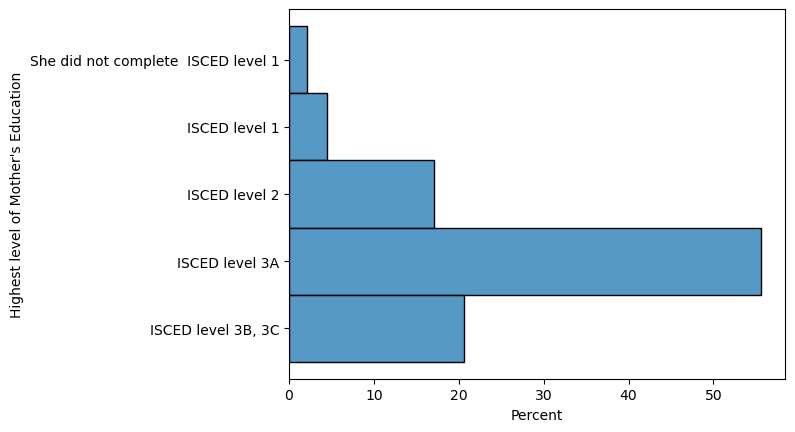

In [424]:
sns.histplot(data=sub_df, y='mother_edu',stat='percent',element='bars');

plt.ylabel("Highest level of Mother's Education");

**Answer**
Most mothers, over 50%, have graduated from secondary education (ISCED level 3A is roughly equivalent to a high school senior). Over 70% have a high school diploma or post-secondary education degree.

### Father's educational background

**Question**

What is the distribution of fathers who have secondary or post-secondary education?

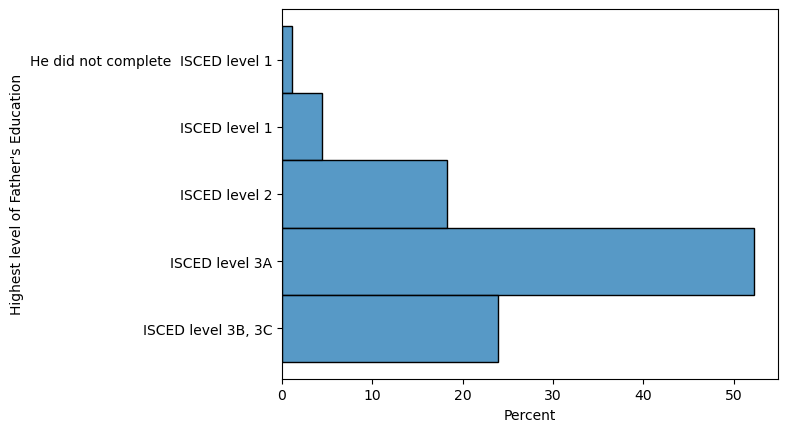

In [425]:
order = sub_df['father_edu'].value_counts().index

sns.histplot(data=sub_df, y='father_edu', stat='percent')

plt.ylabel("Highest level of Father's Education");


**Answer**

Once again, the majority of fathers, over 50%, have at least a high school diploma, and roughly 75% have a high school diploma or higher.

## Parental education take aways

The vast majority of parents in this sample have at least a high-school level education. I am curious to see if students who have parents who completed high school or beyond score better overall on the exams.

## Socio-Economic Factors

### Availability of books in the home

**Question**

How many students have access to multiple books at home? Books are a luxury item that can point to socio-economic status, but access to books and reading material in the home is also a proven indicator of educational performance.

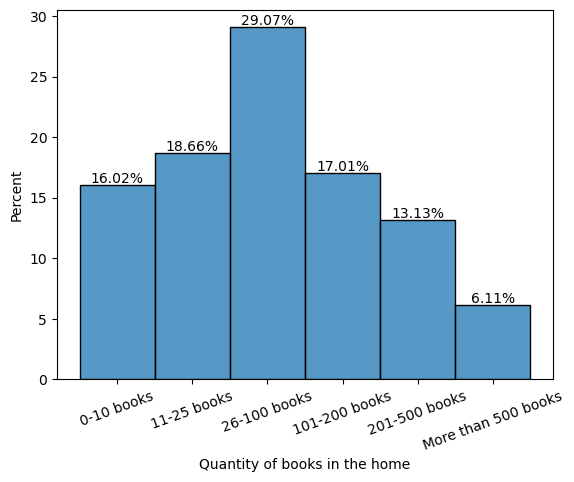

In [429]:
ax = sns.histplot(data=sub_df, x='qty_books', stat='percent');

plt.xticks(rotation=20)
plt.xlabel('Quantity of books in the home')
ax.bar_label(ax.containers[0], fmt='%.2f%%');

**Answer**

Roughly 36% of students estimate that they have over 100 books at home. Most students estimate that they have 100 or fewer, with 16% stating they have ten or fewer. I would hypothesize that students who have fewer books at home read less and score lower on the exams, especially the reading exam.

## School behavior

### Repeating grades

**Question**

I would like to know how many students have repeated a grade.

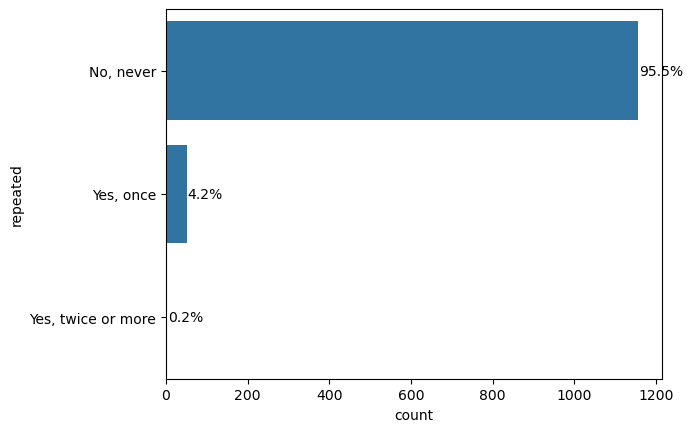

In [238]:
order = sub_df['repeated'].value_counts().index

repeat_counts = sub_df['repeated'].value_counts()
total_count = repeat_counts.sum()

sns.countplot(data=sub_df, y='repeated', color='tab:blue', order=order)
for i, count in enumerate(repeat_counts):
    # Convert count into a percentage, and then into string
    pct_string = f'{100*count/total_count:.1f}%'
    plt.text(count+1, i, pct_string, va='center')

**Answer**

The vast majority of students have not repeated a grade. Since there is such a large difference between the responses, it might be worth breaking this column down to research further if repeating a grade has an effect on student exam scores.

## Exam Scores

**Question**

What is the breakdown of exam scores?

In [239]:
sub_df['pv1math'].value_counts()

440.681    2
565.576    2
697.233    1
550.702    1
453.040    1
          ..
585.091    1
499.467    1
517.514    1
686.818    1
594.942    1
Name: pv1math, Length: 1209, dtype: int64

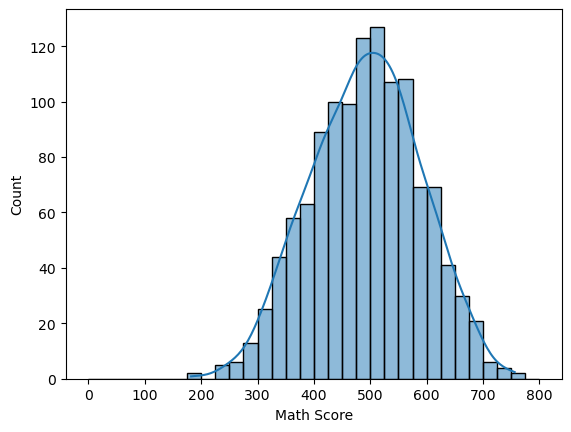

In [436]:
bins=np.arange(0, sub_df['pv1math'].max()+50, 25)

sns.histplot(data=sub_df, x='pv1math', bins=bins, stat='count', kde=True)

plt.xlabel('Math Score');

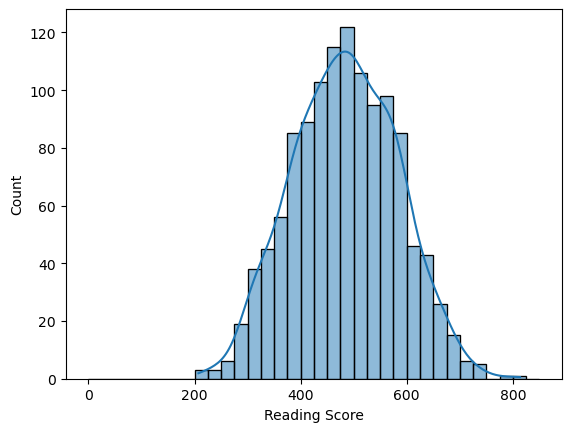

In [435]:
bins=np.arange(0, sub_df['pv1read'].max()+50, 25)

sns.histplot(data=sub_df, x='pv1read', bins=bins, stat='count', kde=True)

plt.xlabel('Reading Score');

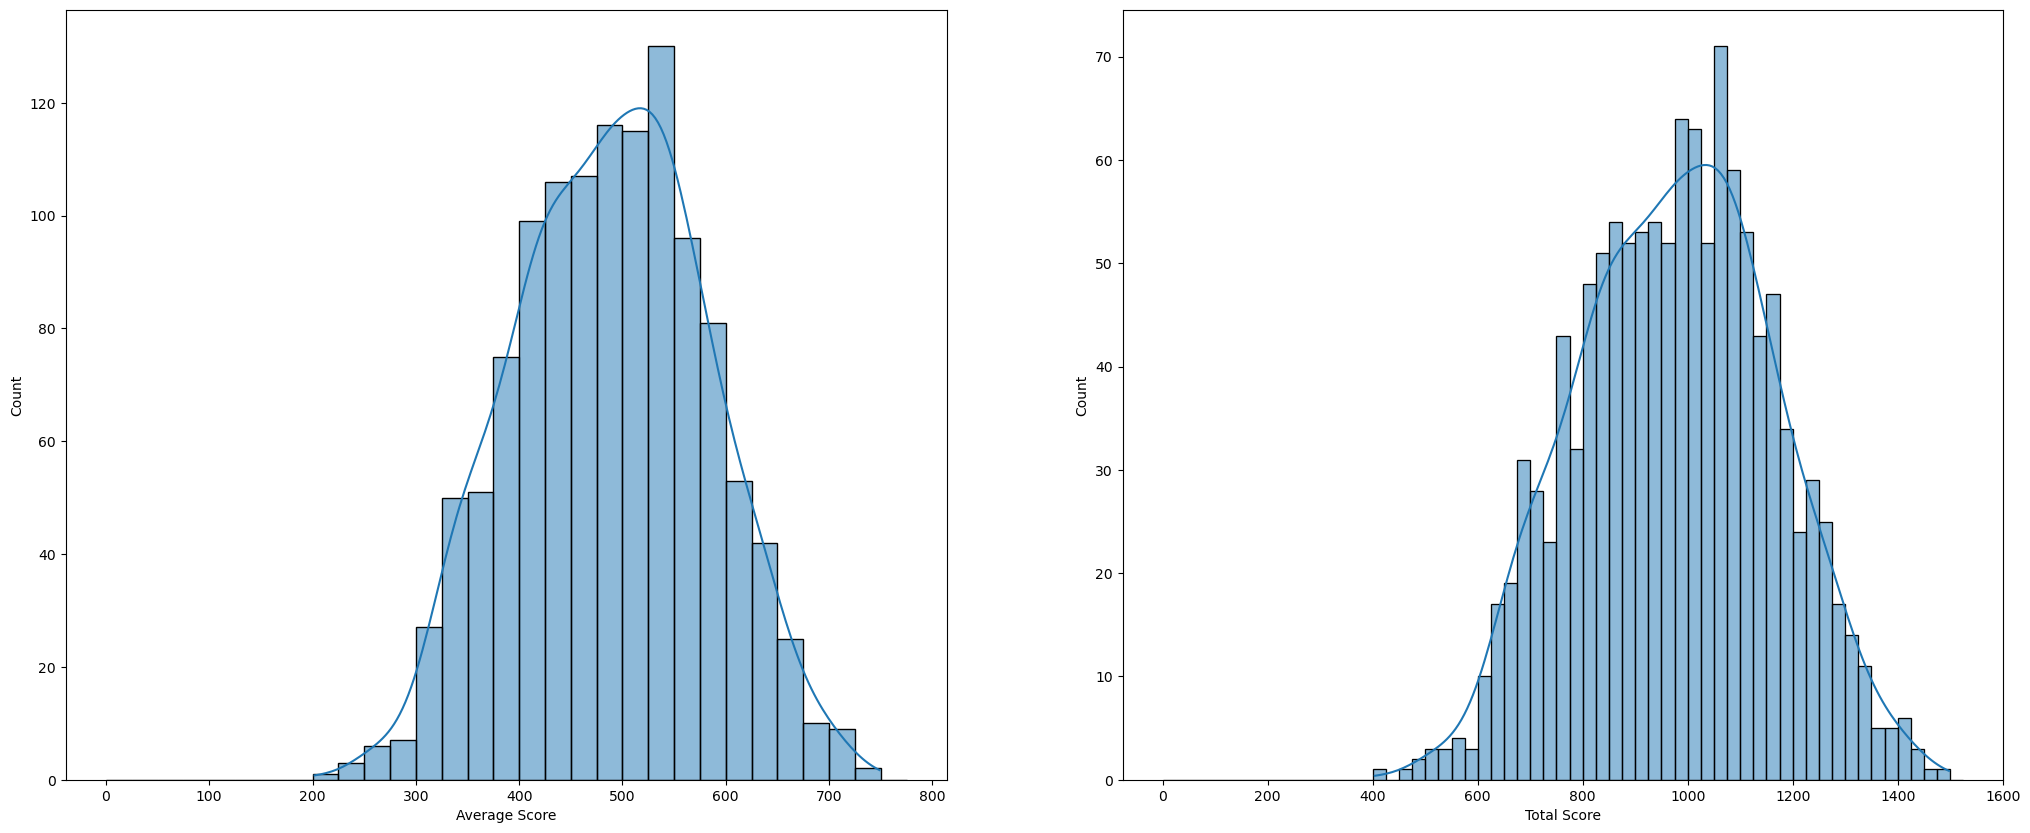

In [437]:
bins1=np.arange(0, sub_df['avg_score'].max()+50, 25)
bins2=np.arange(0, sub_df['tot_score'].max()+50, 25)

fig, ax = plt.subplots(1,2,figsize=(25,10))

sns.histplot(data=sub_df, x='avg_score', bins=bins1, kde=True, ax=ax[0])
ax[0].set_xlabel('Average Score');

sns.histplot(data=sub_df, x='tot_score', bins=bins2, kde=True, ax=ax[1])
ax[1].set_xlabel('Total Score');

**Answer**

The scores on the exam mostly follow a normal curve, which is unsurprising. It does appear that math scores are slightly higher on average than reading scores, but it is not likely statistically significant.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I was slightly surprised at the level of education recorded for parents involved in the exams. I did not perform any transformations as there is not a ton of quantitative data, and the quantitative data that is available is relatively normal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I created two summary columns of exam scores, one for the average of the two exams and one for the total of the two exams. I ordered the values of several columns (mother_edu, father_edu, qty_books, time_reading) to ensure sequential visualizations.

## Bivariate Exploration


## School behavior

### class time and exam score

**Question**

Does more time in class mean a higher score on the exams?

Text(0.5, 0, 'Average Exam Score')

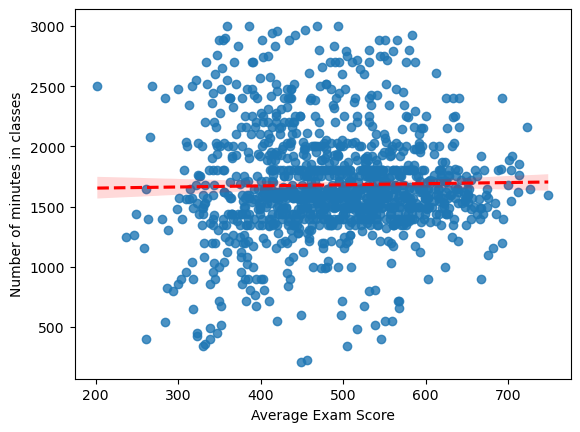

In [243]:
sns.regplot(data=sub_df, y='tmins',x='avg_score',line_kws=dict(color='r', linestyle='--'));

plt.ylabel('Number of minutes in classes')
plt.xlabel('Average Exam Score')

**Answer**

There does not appear to be. much of a correlation between time in class and exam scores.

## Socio-econic status

**Question**

Is there a correlation between family wealth and exam scores?

Text(0.5, 0, 'Average Exam Score')

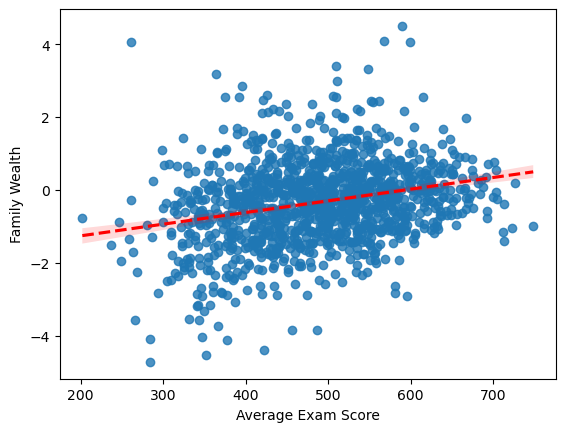

In [244]:
sns.regplot(data=sub_df, y='wealth',x='avg_score',line_kws=dict(color='r', linestyle='--'));

plt.ylabel('Family Wealth')
plt.xlabel('Average Exam Score')

**Answer**

There is a slight positive correlation between wealth and exam scores. It would be valuable to see what other factors could contribute to the correlation.


**Question**

Is there a correlation between the number of books in the home and exam score?


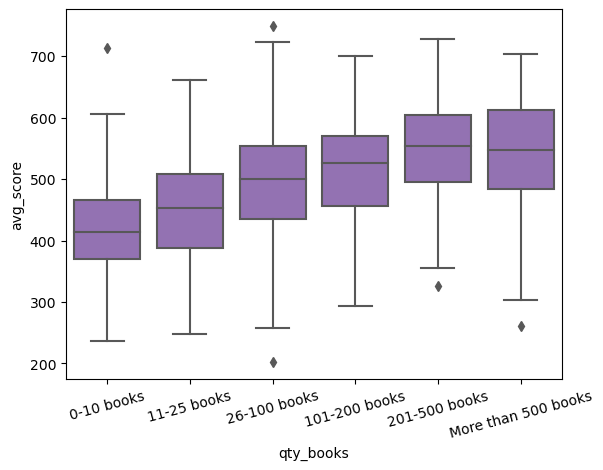

In [245]:
ax1=sns.boxplot(data=sub_df, x='qty_books',y='avg_score', color='tab:purple')
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim());

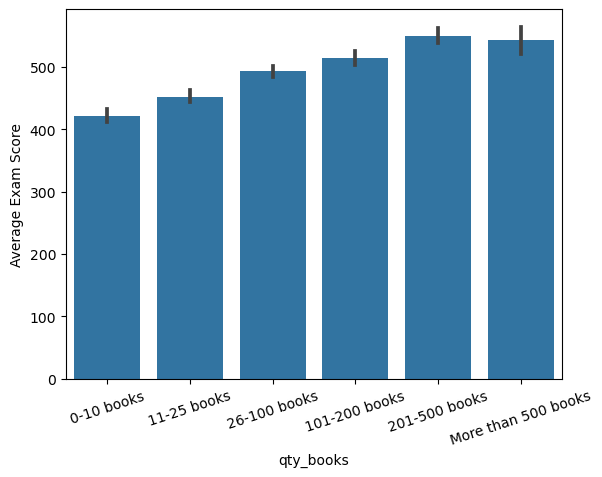

In [263]:
sns.barplot(data=sub_df, x='qty_books',y='avg_score',
           color='tab:blue');
plt.xticks(rotation=18)
plt.ylabel('Average Exam Score');

**Answer**

There is a positive correlation between the number of books in the home and the average exam score. It would be valuable to determine if there could be other causes of this correlation, like overall family wealth, or time spent reading.

## Parents' education

**Question**

Is there a correlation between parents' education and exam scores?

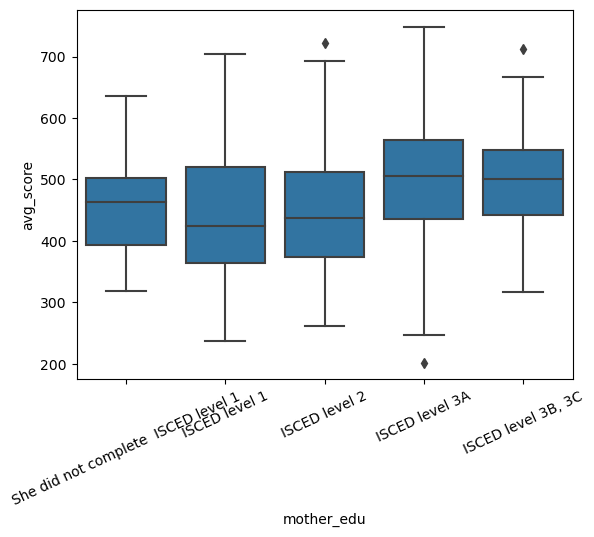

In [246]:
ax1=sns.boxplot(data=sub_df, x='mother_edu',y='avg_score', color='tab:blue')
plt.xticks(rotation=25)
plt.ylim(ax1.get_ylim());

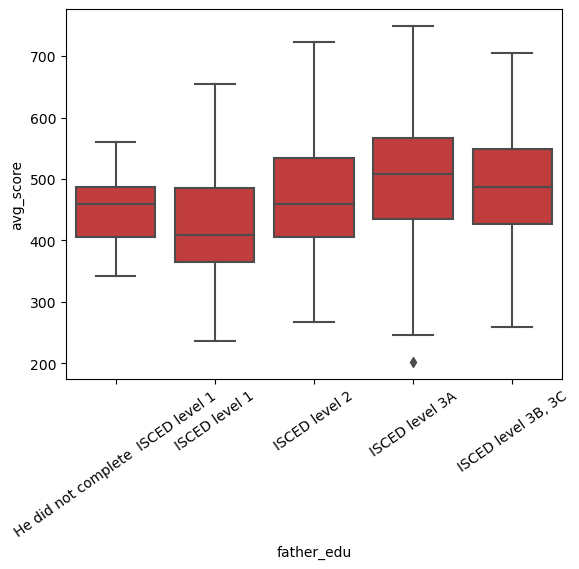

In [247]:
ax1=sns.boxplot(data=sub_df, x='father_edu',y='avg_score', color='tab:red')
plt.xticks(rotation=35)
plt.ylim(ax1.get_ylim());

**Answer**

There does appear to be a positive correlation between the level of education of household parents and exam scores of students. It would be interesting to see if parents with higher education also earn more, which has already shown a positive correlation to exam scores.

### Deeper Dives

**Question**

Does the presence of more books in the home increase reading time?

In [248]:
# Use group_by() and size() to get the number of books and each combination of the two variable levels as a pandas Series
bk_counts = sub_df.groupby(['avg_score','qty_books']).size()
bk_counts

avg_score  qty_books          
202.0095   0-10 books             0
           11-25 books            0
           26-100 books           1
           101-200 books          0
           201-500 books          0
                                 ..
748.7450   11-25 books            0
           26-100 books           1
           101-200 books          0
           201-500 books          0
           More than 500 books    0
Length: 7260, dtype: int64

In [249]:
bk_counts = bk_counts.reset_index(name='count')

In [250]:
bk_counts = bk_counts.pivot(index='qty_books', columns='avg_score', values='count')

In [259]:
bk_counts = sub_df.groupby(['qty_books', 'time_reading']).size()
bk_counts

qty_books            time_reading                                      
0-10 books           I do not read for enjoyment                            79
                     30 minutes or less a day                               53
                     More than 30 minutes to less than 60 minutes a day     34
                     1 to 2 hours a day                                     20
                     More than 2 hours a day                                 8
11-25 books          I do not read for enjoyment                            74
                     30 minutes or less a day                               55
                     More than 30 minutes to less than 60 minutes a day     53
                     1 to 2 hours a day                                     33
                     More than 2 hours a day                                11
26-100 books         I do not read for enjoyment                           107
                     30 minutes or less a day              

In [260]:
bk_counts = bk_counts.reset_index(name='count')
bk_counts = bk_counts.pivot(index='qty_books', columns='time_reading', values='count')

<AxesSubplot:xlabel='time_reading', ylabel='qty_books'>

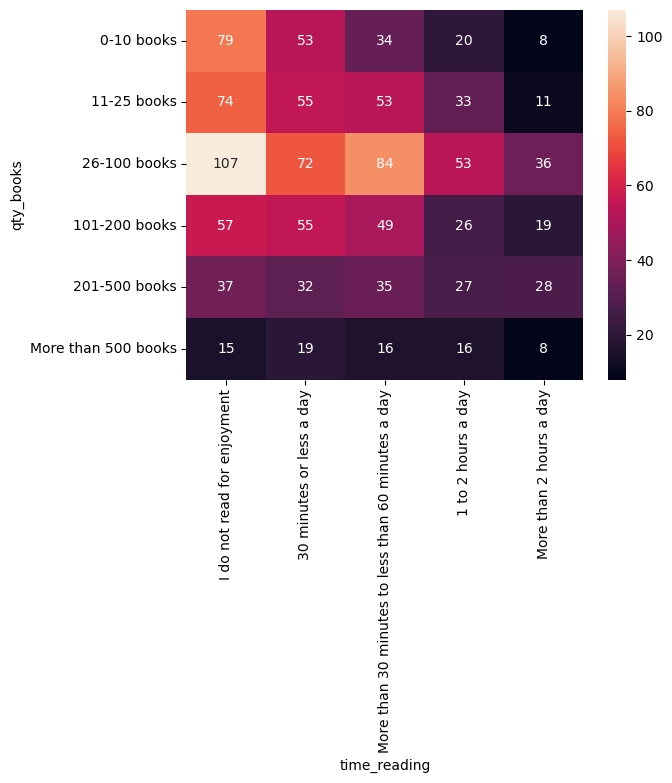

In [261]:
sns.heatmap(bk_counts, annot=True, fmt='d')

**Answer**

Most students do not read for enjoyment, regardless of the number of books they have. However, those who do read outside of school tend to have access to more books at home.

**Question**

Is there a correlation between family wealth and the number of books in the home?

Text(0, 0.5, 'Family Wealth')

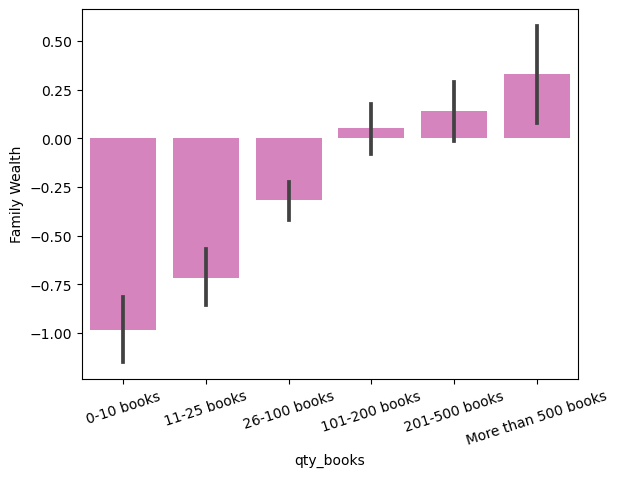

In [262]:
colors=sns.color_palette()[6]

sns.barplot(data=sub_df, x='qty_books',y='wealth',
           color=colors);
plt.xticks(rotation=18)
plt.ylabel('Family Wealth')

**Answer**

There is a definite positive correlation between family wealth and the number of books in the home. This is not wholely surprising as books are a luxury item.

**Question**

Does the education level of parents correlate to reading outside of school?

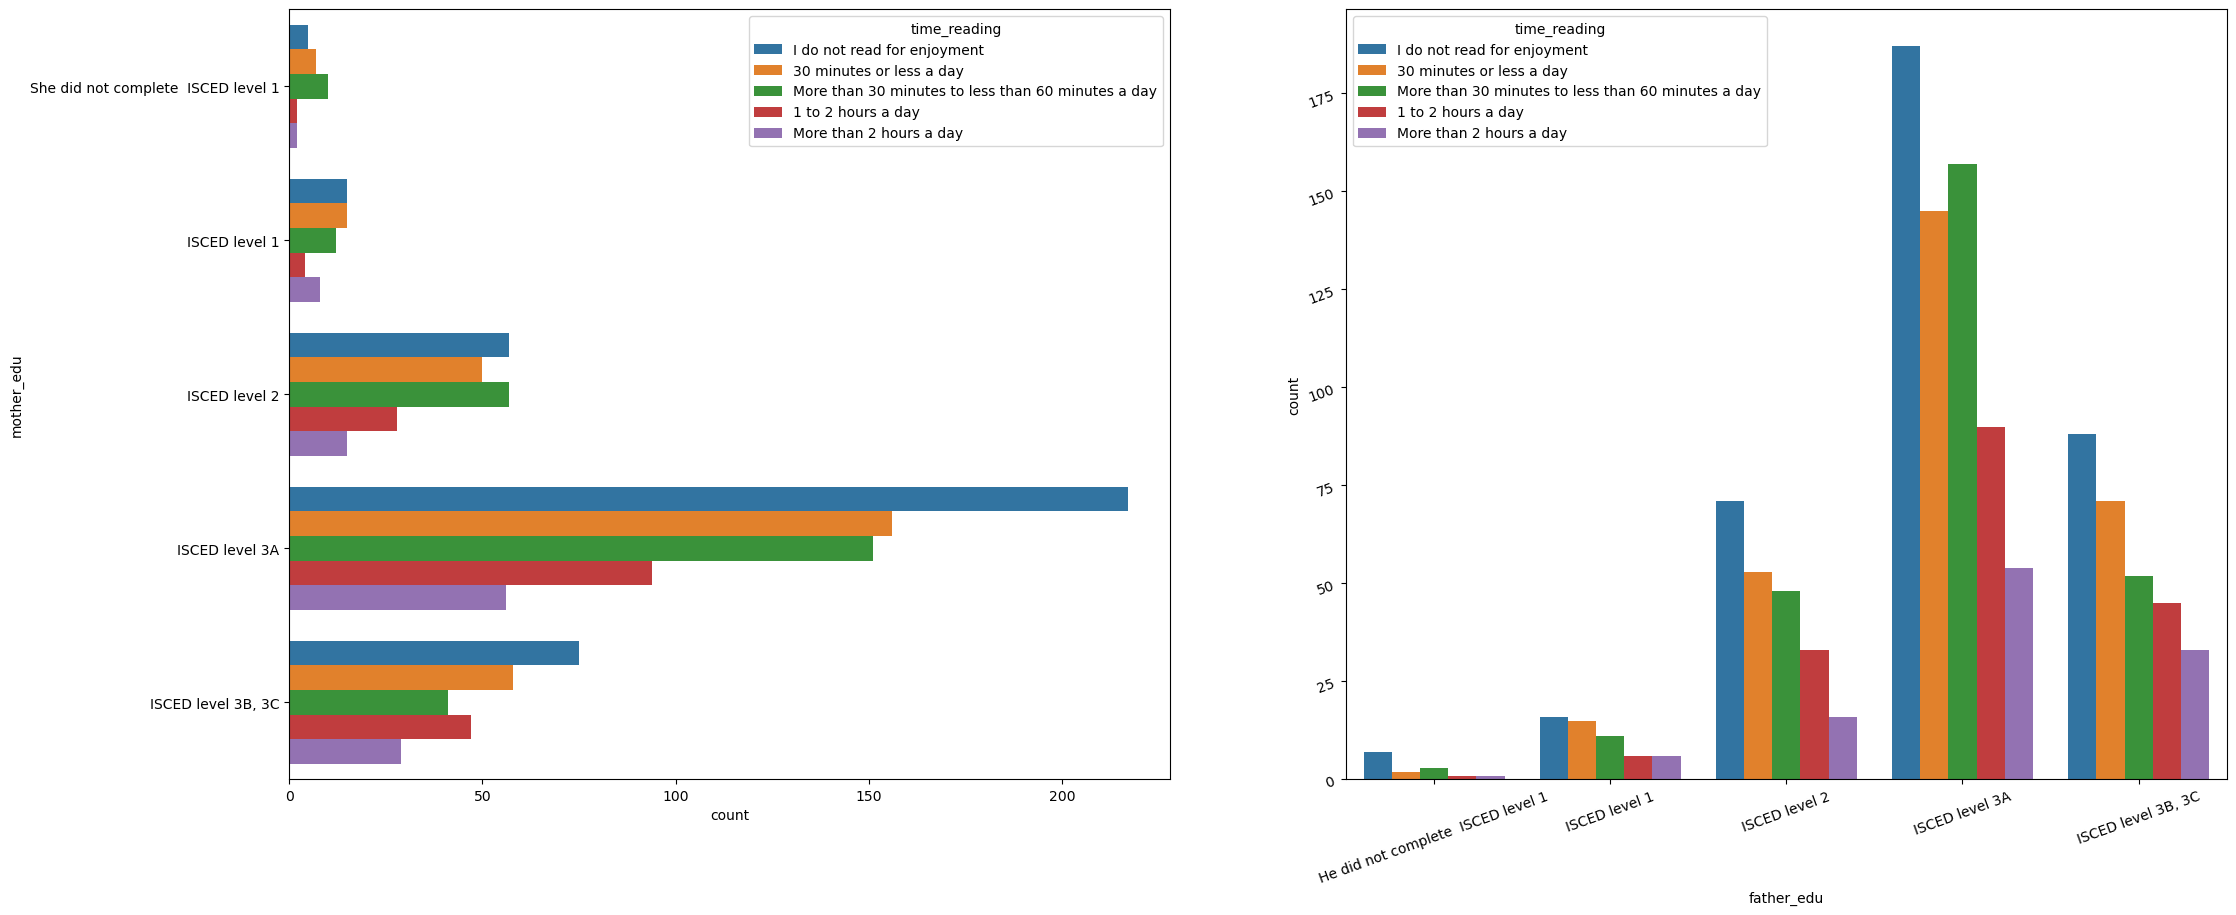

In [258]:
fig, ax = plt.subplots(1,2,figsize=(25,10))

#left plot - mother edu and time reading
sns.countplot(data=sub_df, y='mother_edu', hue='time_reading',ax=ax[0])
plt.yticks(rotation=20);

#right plot - father edu and time reading
sns.countplot(data=sub_df, x='father_edu',hue='time_reading',ax=ax[1])
plt.xticks(rotation=20);

**Answer**

It is interesting that each category of education follow roughly the same shape (most do not read, then read for less than 30 minutes, and so on), except for students whose mother did not complete elementary school. Those students are more likely to read for somewhere between 30 minutes and an hour a day.

**Question**

Does time spent reading correlate with exam scores?

Text(0.5, 0, 'Average Exam Score')

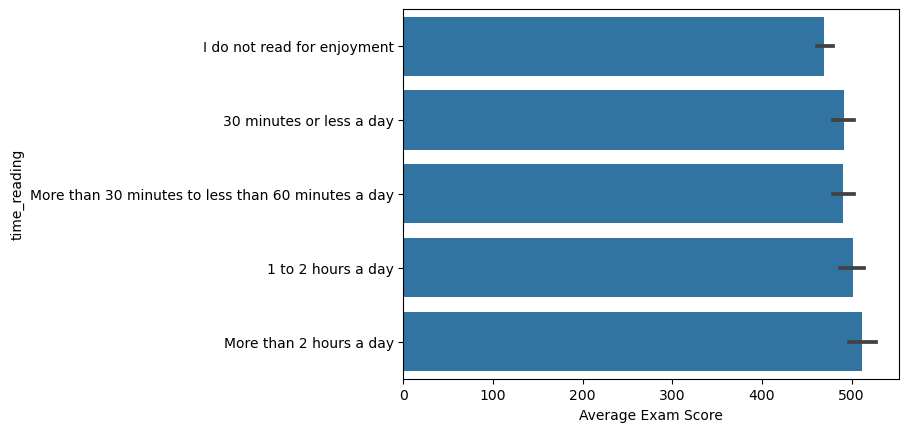

In [264]:
sns.barplot(data=sub_df, y='time_reading',x='avg_score',
           color='tab:blue');

plt.xlabel('Average Exam Score')

**Answer**

There is a slight positive correlation between time spent reading and average exam scores, but not likely enough of one to be statistically significant.

**Question**

How does a sense of belonging (or lack there of) at school affect exam scores?

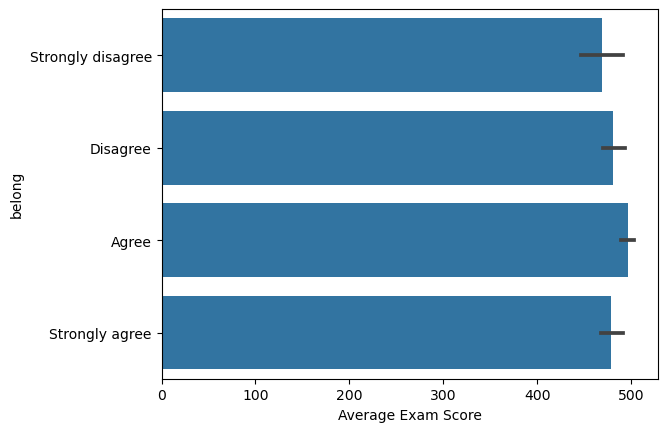

In [268]:
sns.barplot(data=sub_df, y='belong',x='avg_score',
           color='tab:blue');

plt.xlabel('Average Exam Score');

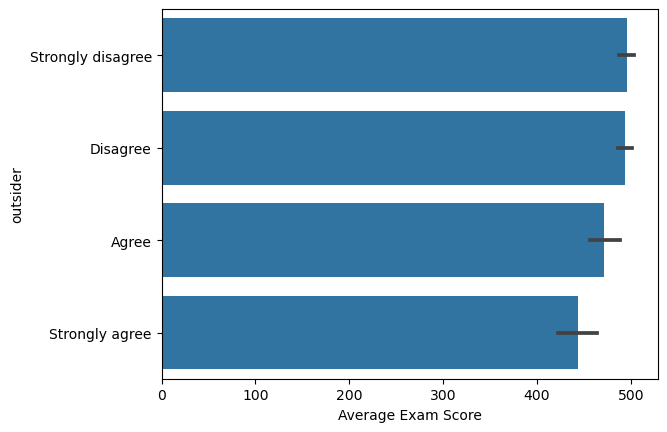

In [269]:
sns.barplot(data=sub_df, y='outsider',x='avg_score',
           color='tab:blue');

plt.xlabel('Average Exam Score');

**Answer**

There does appear to be a correlation between feeling like they belong at school and a better exam score, and the opposite is true of feeling like an outsider at school. Though the scores seem close, there is enough of a difference between the highest scoring bars and the lowest scoring bars to potentially be significant.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Wealth does interact with exam scores, both in general family wealth and factors of wealth, such as the number of books in the home. Another possible indicator of exam scores is a sense of belonging at school. For me, though, the most interesting finding is that students whose mother did not finish elementary school are more likely than other students to read for pleasure. That could be an interesting research project worth further study.


## Multivariate Exploration


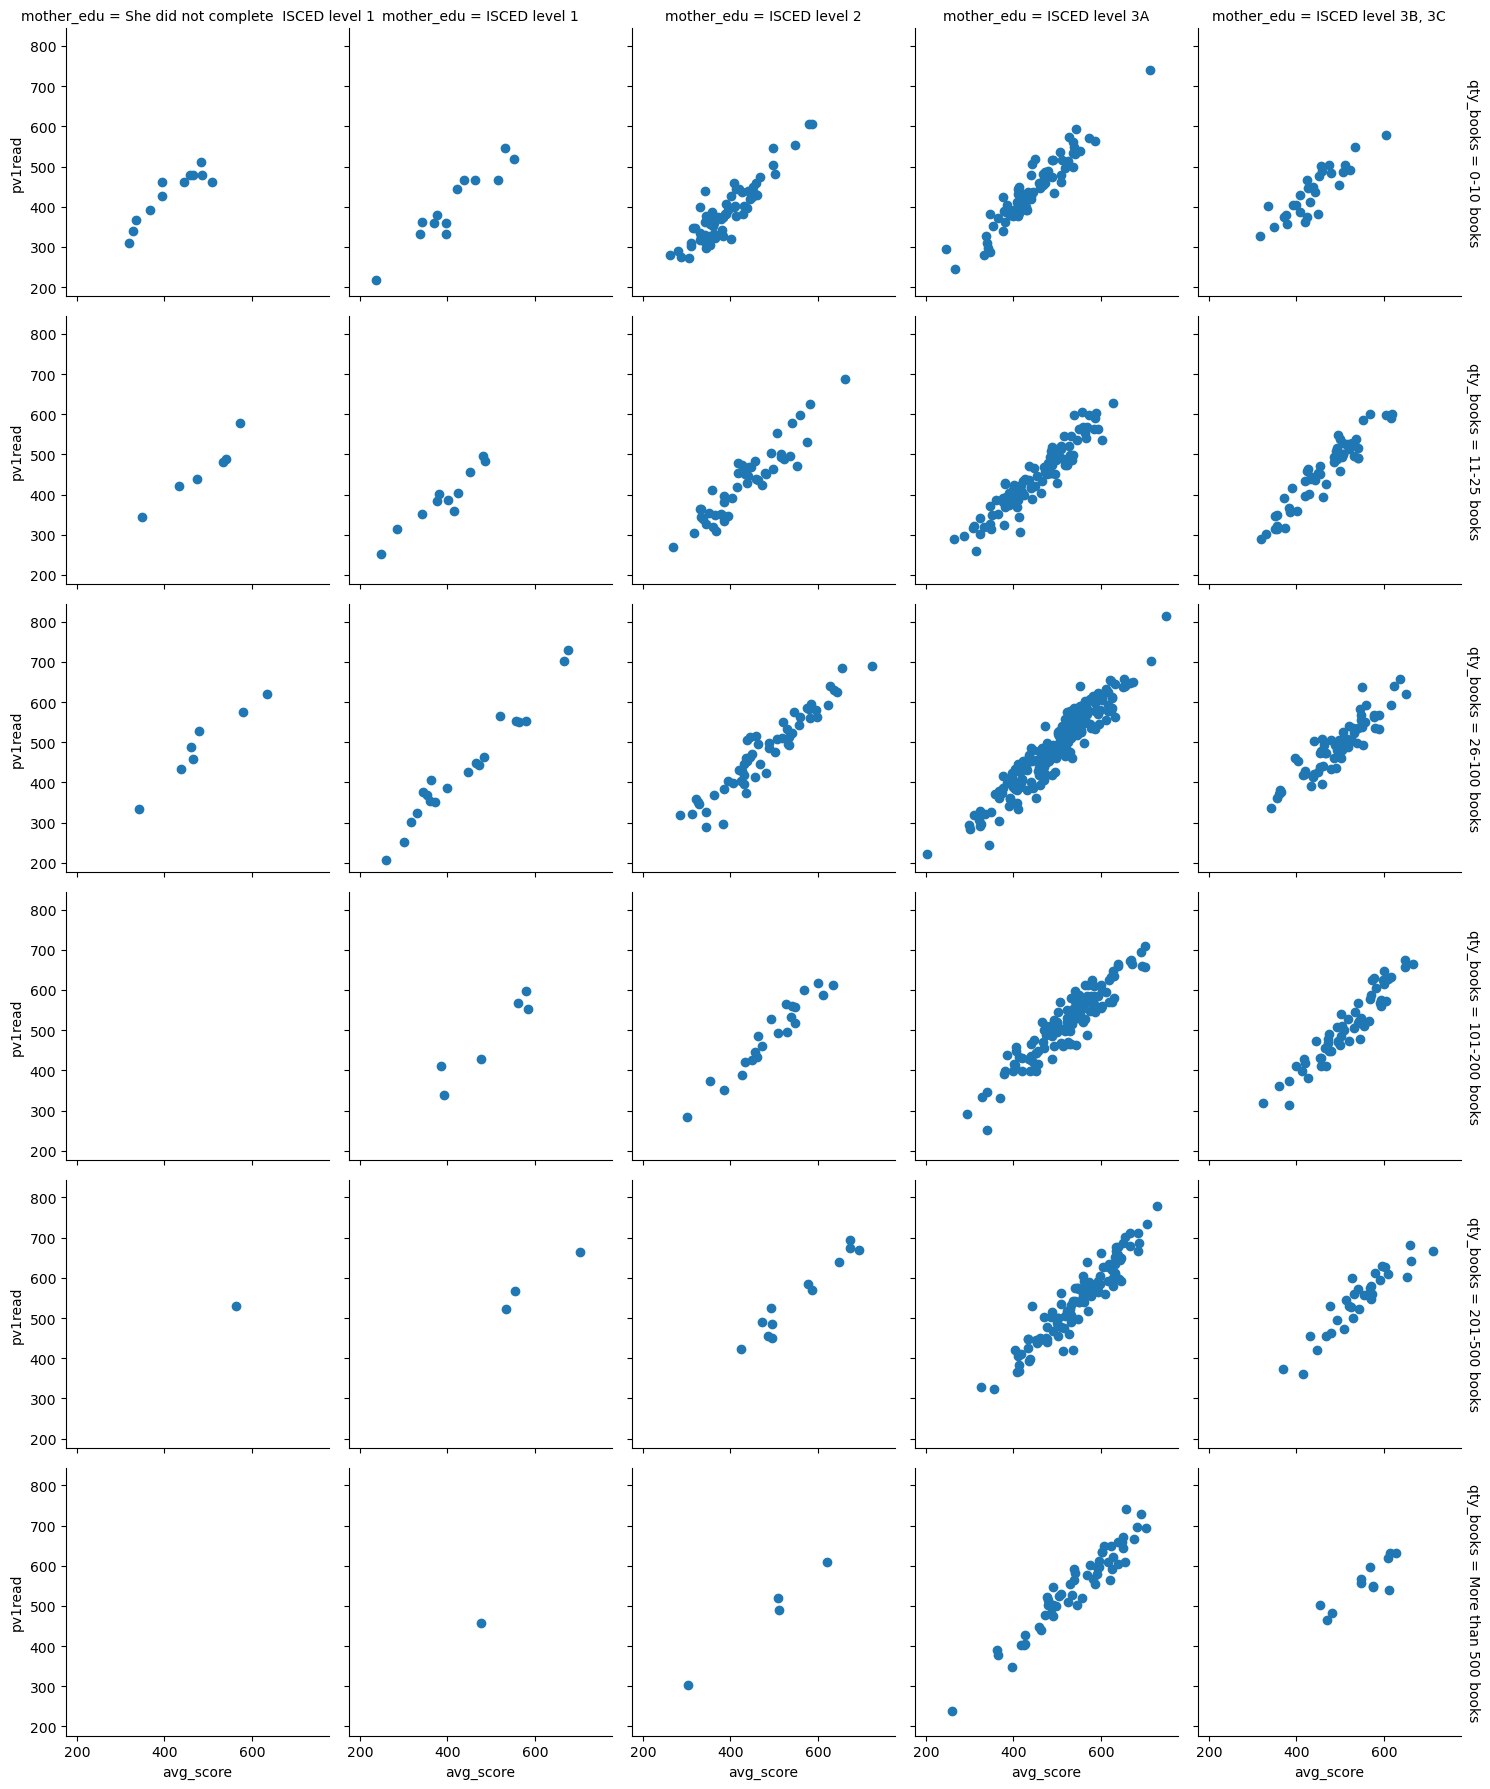

In [265]:
g = sns.FacetGrid(data=sub_df, col='mother_edu', row='qty_books', margin_titles=True)#margin_titles=True moves row titles to the side

g.map(plt.scatter, 'avg_score','pv1read')

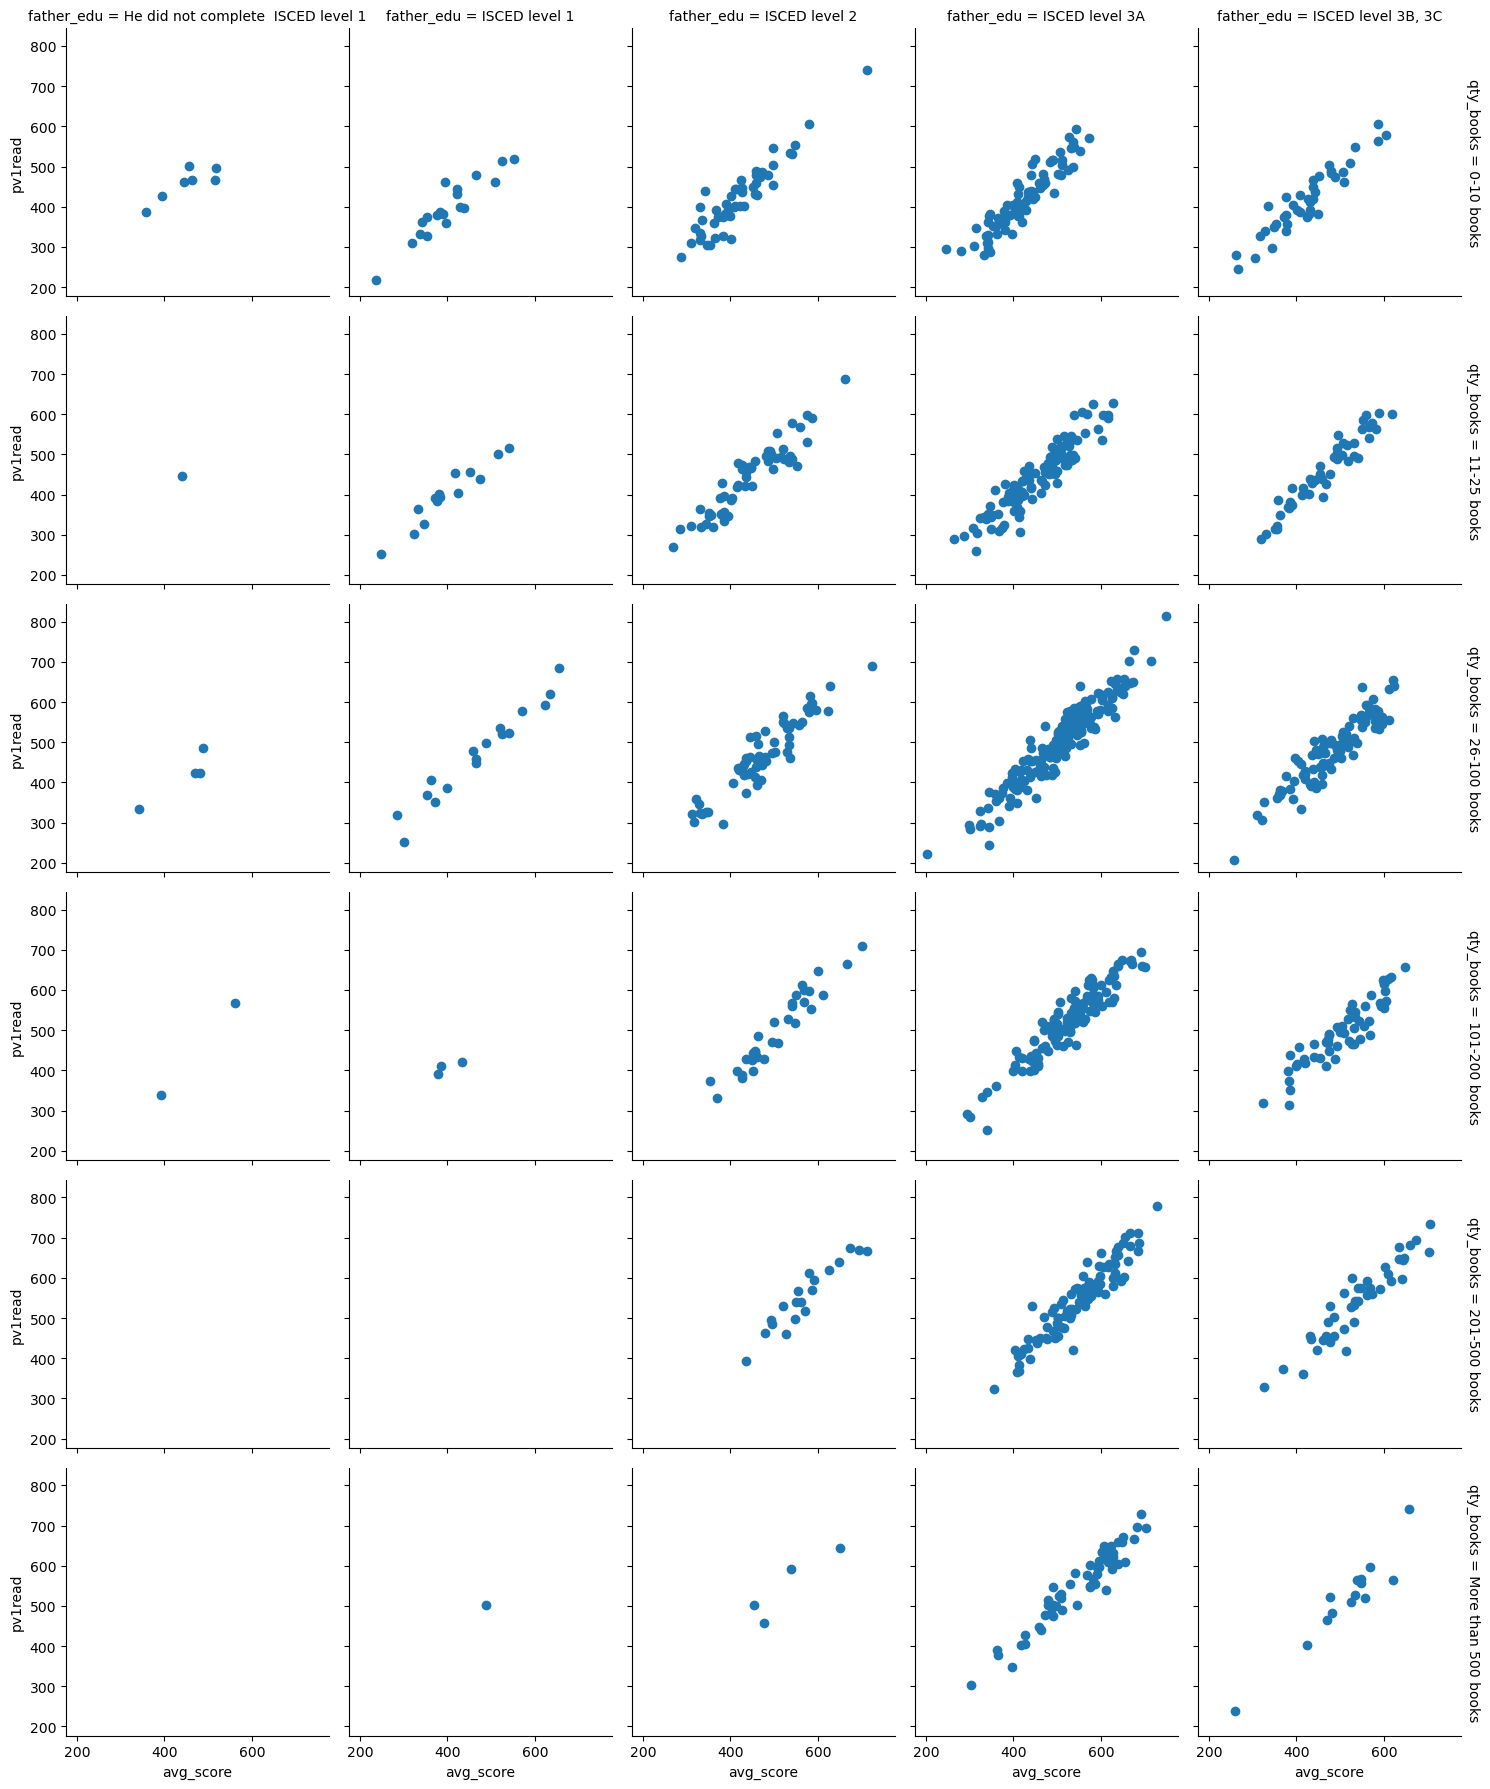

In [266]:
g = sns.FacetGrid(data=sub_df, col='father_edu', row='qty_books', margin_titles=True)#margin_titles=True moves row titles to the side

g.map(plt.scatter, 'avg_score','pv1read')

Text(56.84903549382716, 0.5, 'Math Score')

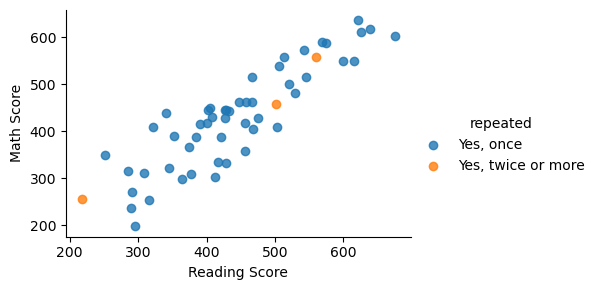

In [287]:
df_sub=sub_df[(sub_df['repeated']=='Yes, once') | (sub_df['repeated']=='Yes, twice or more')]

g = sns.FacetGrid(data=df_sub, hue='repeated',
                hue_order=['Yes, once', 'Yes, twice or more'], aspect=1.5)

g.map(sns.regplot, 'pv1read','pv1math', fit_reg=False);

g.add_legend()
plt.xlabel('Reading Score')
plt.ylabel('Math Score')

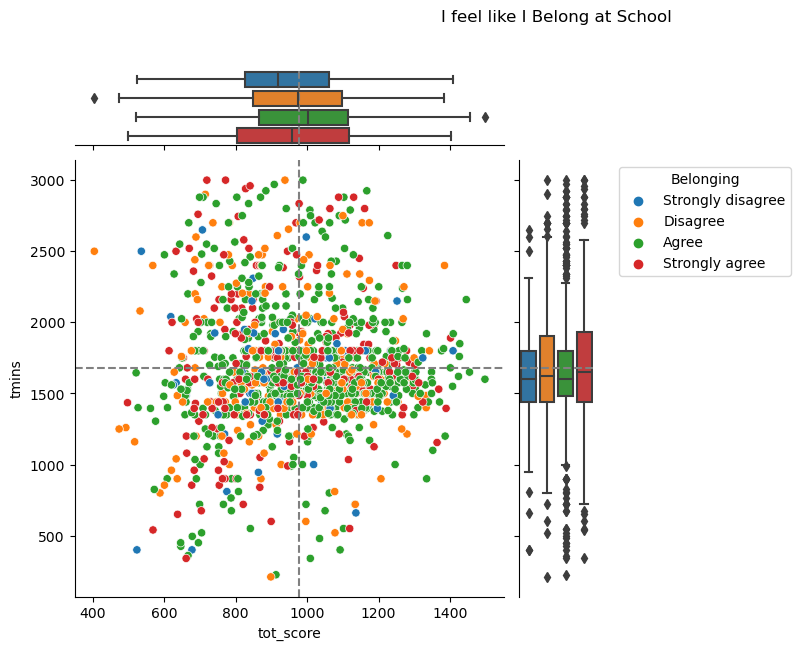

In [357]:
g = sns.JointGrid(data=sub_df, x="tot_score", y="tmins", hue="belong");
g.plot_joint(sns.scatterplot)
sns.boxplot(data=sub_df, x=g.hue, y=g.y, ax=g.ax_marg_y)
sns.boxplot(data=sub_df, y=g.hue, x=g.x, ax=g.ax_marg_x)
g.refline(x=sub_df['tot_score'].mean(), y=sub_df['tmins'].mean());

sns.move_legend(g.ax_joint, "upper left", title='Belonging',bbox_to_anchor=(1.25, 1))

plt.title('I feel like I Belong at School',y=1.0,pad=100.0);

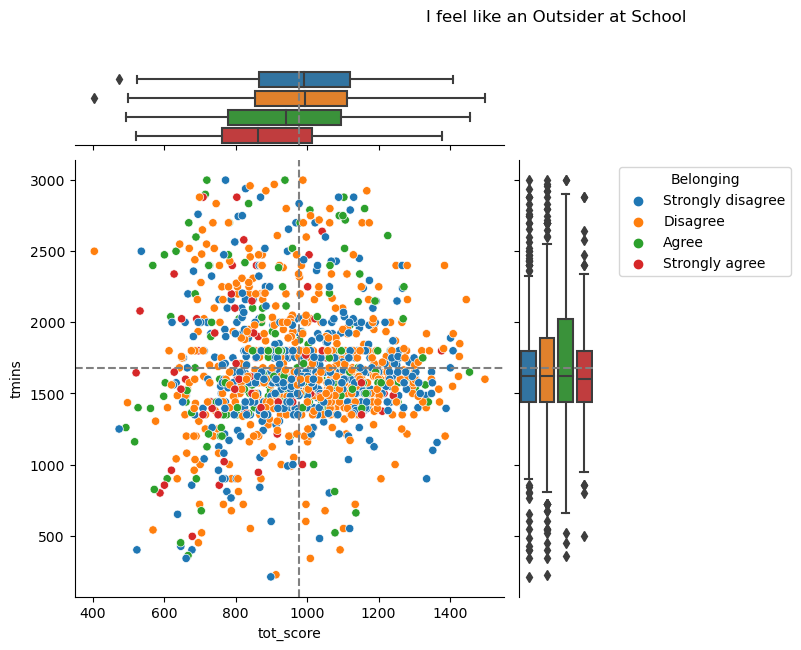

In [358]:
g = sns.JointGrid(data=sub_df, x="tot_score", y="tmins", hue="outsider");
g.plot_joint(sns.scatterplot)
sns.boxplot(data=sub_df, x=g.hue, y=g.y, ax=g.ax_marg_y)
sns.boxplot(data=sub_df, y=g.hue, x=g.x, ax=g.ax_marg_x)
g.refline(x=sub_df['tot_score'].mean(), y=sub_df['tmins'].mean());

sns.move_legend(g.ax_joint, "upper left", title='Belonging',bbox_to_anchor=(1.25, 1))

plt.title('I feel like an Outsider at School',y=1.0,pad=100.0);

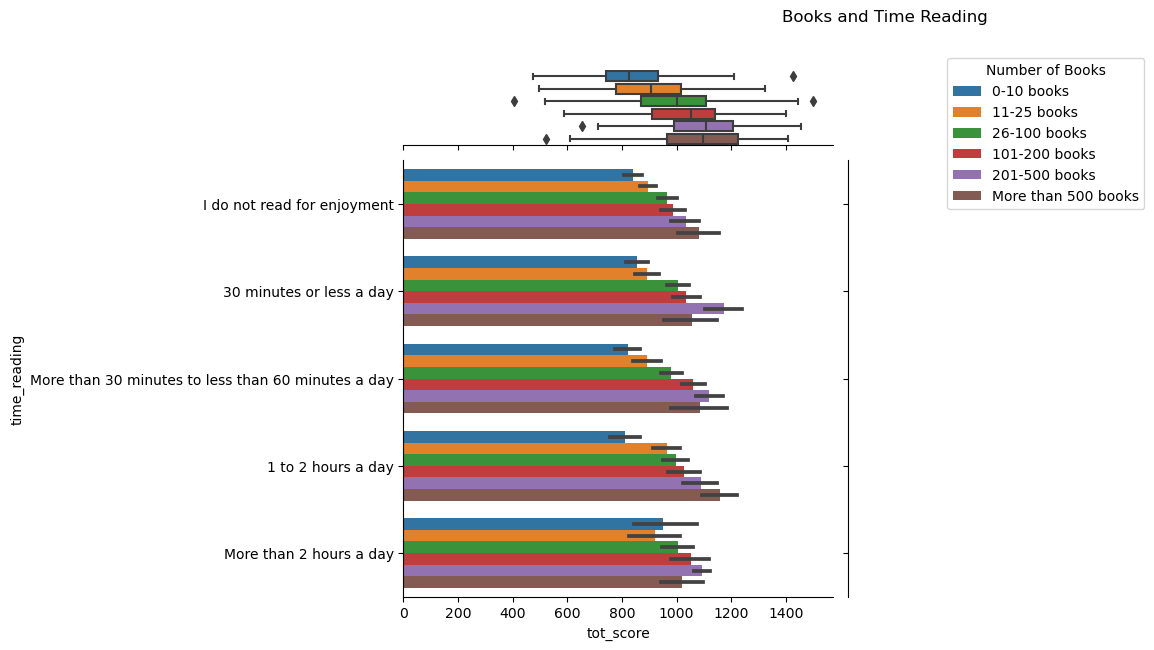

In [423]:
g = sns.JointGrid(data=sub_df, x="tot_score", y="time_reading", hue="qty_books");
g.plot_joint(sns.barplot)
sns.boxplot(data=sub_df, y=g.hue, x=g.x, ax=g.ax_marg_x);

sns.move_legend(g.ax_joint, "upper left", title='Number of Books',bbox_to_anchor=(1.25, 1.25))

plt.title('Books and Time Reading',y=1.0,pad=100.0);

In [379]:
bk_counts = sub_df.groupby(['qty_books', 'time_reading']).size()
bk_counts = bk_counts.reset_index(name='count')
bk_counts = bk_counts.pivot(index='qty_books', columns='time_reading', values='count')
bk_counts

time_reading,I do not read for enjoyment,30 minutes or less a day,More than 30 minutes to less than 60 minutes a day,1 to 2 hours a day,More than 2 hours a day
qty_books,,,,,
0-10 books,79,53,34,20,8
11-25 books,74,55,53,33,11
26-100 books,107,72,84,53,36
101-200 books,57,55,49,26,19
201-500 books,37,32,35,27,28
More than 500 books,15,19,16,16,8


<AxesSubplot:xlabel='qty_books', ylabel='time_reading'>

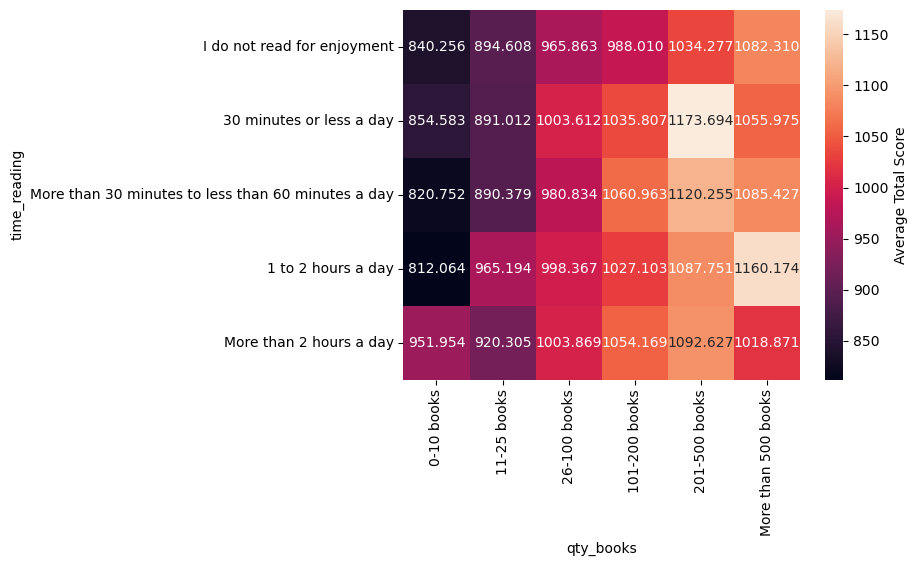

In [386]:
cat_means = sub_df.groupby(['qty_books', 'time_reading']).mean()['tot_score']
cat_means = cat_means.reset_index(name='tot_score_avg')
cat_means = cat_means.pivot(index='time_reading', columns='qty_books',
                            values='tot_score_avg')
sns.heatmap(cat_means, annot=True, fmt='.3f',
           cbar_kws = {'label' : 'Average Total Score'})

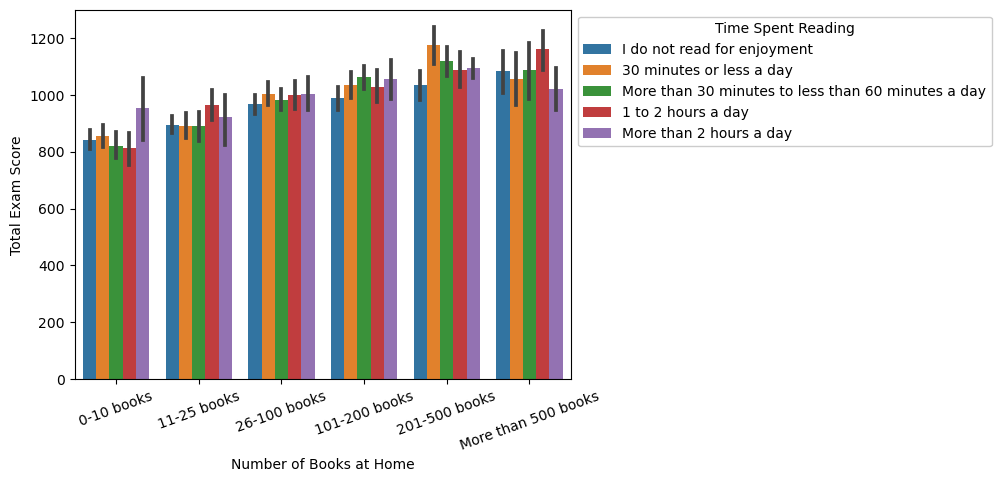

In [401]:
ax = sns.barplot(data=sub_df, x='qty_books', y='tot_score', hue='time_reading')
ax.legend(loc='best', ncol=1, framealpha=1, title='Time Spent Reading',bbox_to_anchor=(1, 1));
plt.xlabel('Number of Books at Home');
plt.xticks(rotation=20);
plt.ylabel('Total Exam Score');


<AxesSubplot:xlabel='mother_edu', ylabel='father_edu'>

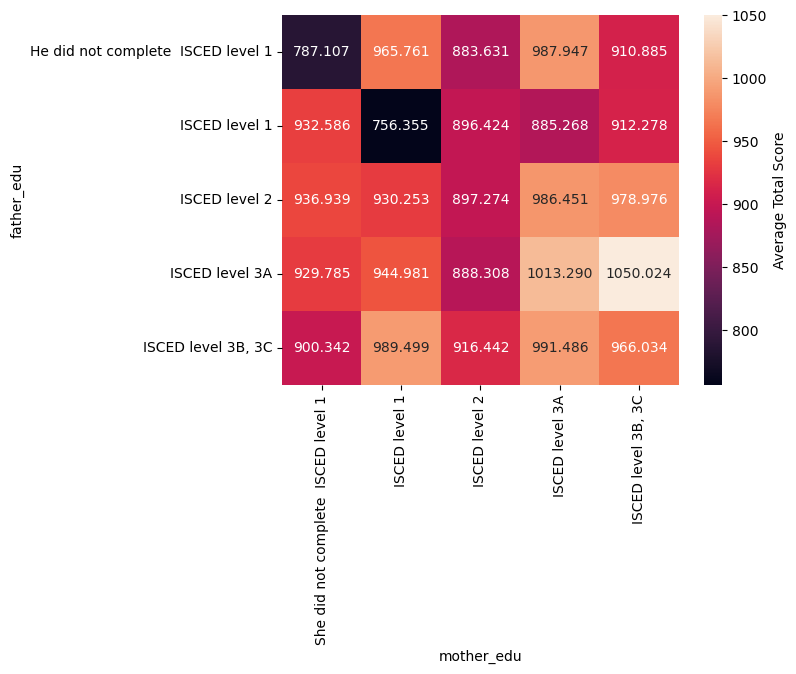

In [402]:
cat_means = sub_df.groupby(['mother_edu', 'father_edu']).mean()['tot_score']
cat_means = cat_means.reset_index(name='tot_score_avg')
cat_means = cat_means.pivot(index='father_edu', columns='mother_edu',
                            values='tot_score_avg')
sns.heatmap(cat_means, annot=True, fmt='.3f',
           cbar_kws = {'label' : 'Average Total Score'})

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Overall, the higher the sense of belonging, the more time a student spends in school. There is also a positive correlation in the relationship between the education level of parents and total exam scores, as well as time spent reading and exam scores when wealth factors like the number of books in the home are factored in to the analysis.

### Were there any interesting or surprising interactions between features?

It does not appear that students who feel like outsiders differ much in attendance, except for the min and max levels. The quartiles and means are about the same across the variable.

## Conclusions
It appears the factors that have the largest impact on exam scores are parent education and a sense of belonging at school.